<a href="https://colab.research.google.com/github/rvdrupal/Neural-Networks-and-Deep-Learning/blob/master/multilinear_reg_using_gd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [0]:
my_data=pd.read_csv("loandata.csv")

In [0]:
my_data.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000.0,0.09,36 months,debt_consolidation,0.15,MORTGAGE,6541.67,14,14272,2,1 year
1,99592.0,19200,19200.0,0.12,36 months,debt_consolidation,0.28,MORTGAGE,4583.33,12,11140,1,2 years
2,80059.0,35000,35000.0,0.22,60 months,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2 years
3,15825.0,10000,9975.0,0.10,36 months,debt_consolidation,0.14,MORTGAGE,3833.33,10,9346,0,5 years
4,33182.0,12000,12000.0,0.12,36 months,credit_card,0.19,RENT,3195.00,11,14469,0,9 years


In [0]:
print(my_data.groupby('Loan.Length')["ID"].count())
my_data["Loan.Length"].replace(['.'],['36 months'],inplace=True)#Replacing with mode
print(my_data.groupby('Loan.Length')["ID"].count())

Loan.Length
.               1
36 months    1950
60 months     547
Name: ID, dtype: int64
Loan.Length
36 months    1951
60 months     547
Name: ID, dtype: int64


###Seperate the Numerical and Categorical variables

In [0]:
my_data.select_dtypes(include=[np.number]).columns.tolist()

['ID',
 'Amount.Requested',
 'Amount.Funded.By.Investors',
 'Interest.Rate',
 'Debt.To.Income.Ratio',
 'Monthly.Income',
 'Open.CREDIT.Lines',
 'Revolving.CREDIT.Balance',
 'Inquiries.in.the.Last.6.Months']

####Removing ID

In [0]:
t=my_data.select_dtypes(include=[np.number]).columns.tolist()[1:]
my_data_num=(my_data[t]-my_data[t].mean())/my_data[t].std()#Normalising Data
my_data_num.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
0,0.973893,1.035149,-0.978090,-0.049918,0.216108,0.872144,-0.052088,0.882222
1,0.871518,0.931836,-0.251714,1.679635,-0.278001,0.429341,-0.223154,0.072547
2,2.893421,2.972262,2.169540,1.147465,1.467145,0.872144,0.368749,0.072547
3,-0.305792,-0.259489,-0.735964,-0.182960,-0.467234,-0.013461,-0.321140,-0.737128
4,-0.049855,0.002022,-0.251714,0.482252,-0.628291,0.207940,-0.041328,-0.737128


Creation of dummy variables

In [0]:
my_data_cat=my_data.select_dtypes(include=['object']).columns.tolist()
my_data_dummies=pd.get_dummies(my_data[my_data_cat])

In [0]:
my_data_dummies.head()

,Loan.Length_36 months,Loan.Length_60 months,Loan.Purpose_car,Loan.Purpose_credit_card,Loan.Purpose_debt_consolidation,Loan.Purpose_educational,Loan.Purpose_home_improvement,Loan.Purpose_house,Loan.Purpose_major_purchase,Loan.Purpose_medical,Loan.Purpose_moving,Loan.Purpose_other,Loan.Purpose_renewable_energy,Loan.Purpose_small_business,Loan.Purpose_vacation,Loan.Purpose_wedding,Home.Ownership_MORTGAGE,Home.Ownership_NONE,Home.Ownership_OTHER,Home.Ownership_OWN,Home.Ownership_RENT,Employment.Length_1 year,Employment.Length_10+ years,Employment.Length_2 years,Employment.Length_3 years,Employment.Length_4 years,Employment.Length_5 years,Employment.Length_6 years,Employment.Length_7 years,Employment.Length_8 years,Employment.Length_9 years
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [0]:
my_data_combined=pd.concat([my_data_num, my_data_dummies],axis=1)
my_data_combined.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Loan.Length_36 months,Loan.Length_60 months,Loan.Purpose_car,Loan.Purpose_credit_card,Loan.Purpose_debt_consolidation,Loan.Purpose_educational,Loan.Purpose_home_improvement,Loan.Purpose_house,Loan.Purpose_major_purchase,Loan.Purpose_medical,Loan.Purpose_moving,Loan.Purpose_other,Loan.Purpose_renewable_energy,Loan.Purpose_small_business,Loan.Purpose_vacation,Loan.Purpose_wedding,Home.Ownership_MORTGAGE,Home.Ownership_NONE,Home.Ownership_OTHER,Home.Ownership_OWN,Home.Ownership_RENT,Employment.Length_1 year,Employment.Length_10+ years,Employment.Length_2 years,Employment.Length_3 years,Employment.Length_4 years,Employment.Length_5 years,Employment.Length_6 years,Employment.Length_7 years,Employment.Length_8 years,Employment.Length_9 years
0,0.973893,1.035149,-0.978090,-0.049918,0.216108,0.872144,-0.052088,0.882222,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.871518,0.931836,-0.251714,1.679635,-0.278001,0.429341,-0.223154,0.072547,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2.893421,2.972262,2.169540,1.147465,1.467145,0.872144,0.368749,0.072547,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,-0.305792,-0.259489,-0.735964,-0.182960,-0.467234,-0.013461,-0.321140,-0.737128,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,-0.049855,0.002022,-0.251714,0.482252,-0.628291,0.207940,-0.041328,-0.737128,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [0]:
my_data_combined.isnull().sum(axis=0)

Amount.Requested                   0
Amount.Funded.By.Investors         0
Interest.Rate                      0
Debt.To.Income.Ratio               0
Monthly.Income                     0
Open.CREDIT.Lines                  0
Revolving.CREDIT.Balance           0
Inquiries.in.the.Last.6.Months     0
Loan.Length_36 months              0
Loan.Length_60 months              0
Loan.Purpose_car                   0
Loan.Purpose_credit_card           0
Loan.Purpose_debt_consolidation    0
Loan.Purpose_educational           0
Loan.Purpose_home_improvement      0
Loan.Purpose_house                 0
Loan.Purpose_major_purchase        0
Loan.Purpose_medical               0
Loan.Purpose_moving                0
Loan.Purpose_other                 0
Loan.Purpose_renewable_energy      0
Loan.Purpose_small_business        0
Loan.Purpose_vacation              0
Loan.Purpose_wedding               0
Home.Ownership_MORTGAGE            0
Home.Ownership_NONE                0
Home.Ownership_OTHER               0
H

In [0]:
# Putting feature variable to X
X = my_data_combined.drop('Interest.Rate', axis= 1)

# Putting response variable to y
y = my_data_combined[['Interest.Rate']]

In [0]:
ones=np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
theta=np.zeros([1,X.shape[1]])

In [0]:
np.shape(theta)

(1, 39)

In [0]:
#set hyper parameters
alpha = 0.01
iters = 1000
m=X.shape[0]

In [0]:
def computeCost(X,y,theta):
  cost=1/(2*m)*np.sum(np.power(((X @ theta.T)-y),2))
  return cost

In [0]:

#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/m) * ((X @ theta.T - y).T @ X)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost



In [0]:
#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

                     0         1         2   ...        36        37        38
Interest.Rate  0.073343  0.092093  0.155201  ...  0.032622 -0.000009 -0.021312

[1 rows x 39 columns]
Interest.Rate    0.350954
dtype: float64


Text(0.5, 1.0, 'Error vs. Training Epoch')

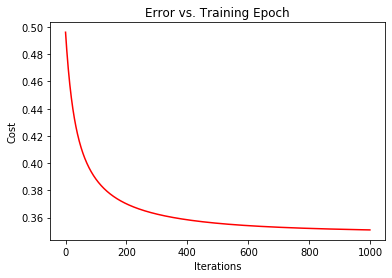

In [0]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 

In [0]:
y_pred_gd=np.dot(X,g.T)
print(y_pred[1:5])
print(y_pred_gd[1:5])

[[ 0.08671656]
 [ 1.24137988]
 [-0.41004728]
 [-0.17303088]]
[[ 0.16043645]
 [ 1.25103155]
 [-0.42415853]
 [-0.10098712]]


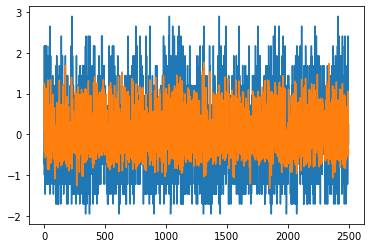

In [0]:
plt.plot(np.arange(2500),y,)
plt.plot(np.arange(2500),y_pred_gd)

#Same problem using Library

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr=LinearRegression()

In [0]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred=lr.predict(X)

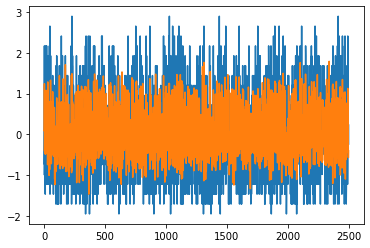

In [0]:
plt.plot(np.arange(2500),y,)
plt.plot(np.arange(2500),y_pred)

In [0]:
list(zip(lr.coef_))

[(array([ 1.05414164e-16,  6.79252343e-03,  2.18265867e-01,  1.09736180e-01,
         -4.43286016e-02, -1.03423189e-02, -8.54086956e-03,  1.85297642e-01,
          1.41363103e+00,  2.25459829e+00, -8.20409818e-01, -3.77716122e-01,
         -3.71473583e-01, -6.10441408e-01, -7.19710681e-01, -4.42982906e-01,
         -7.43841052e-01, -6.24792651e-01, -2.08296029e-01, -2.85479426e-01,
         -8.01739483e-01, -5.06416769e-01, -4.57826858e-01, -4.75403770e-01,
         -7.70100101e-01, -2.13785297e+00,  1.92092851e-01, -5.81136934e-01,
         -4.95539578e-01, -3.35919527e-02, -8.78992562e-03, -8.32998824e-02,
         -1.03663453e-01, -2.07771867e-02,  2.85786895e-02, -1.33498657e-02,
          5.28677416e-02, -4.95263885e-02, -1.36997793e-01]),)]

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
mean_squared_error(y,y_pred)


0.6910550472164132

#Cost minimization with gradient decent(.35) is better than Sklearn Library(.69)